<a href="https://colab.research.google.com/github/DuyHung-1254/identify_diseased_plant/blob/main/Plant_official.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:

cd /content/drive/MyDrive/Colab_Notebooks/plant


/content/drive/MyDrive/Colab_Notebooks/plant


In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/plant/plant-pathology-2020-fgvc7.zip -d /content/drive/MyDrive/Colab_Notebooks/plant/data_2

Archive:  /content/drive/MyDrive/Colab_Notebooks/plant/plant-pathology-2020-fgvc7.zip
replace /content/drive/MyDrive/Colab_Notebooks/plant/data_2/images/Test_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

data_train = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/plant/data_2/train.csv")
data_test = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/plant/data_2/test.csv")

In [ ]:
data_train.head(20)

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
5,Train_5,1,0,0,0
6,Train_6,0,1,0,0
7,Train_7,0,0,0,1
8,Train_8,0,0,0,1
9,Train_9,1,0,0,0


In [ ]:

train_image = []
for name in data_train['image_id']:
  img   = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/plant/data_2/images/'+name+'.jpg')
  image = cv2.resize(img, (200, 200))
  train_image.append(image)

X_train = np.array(train_image)/255


len(X_train)

1821

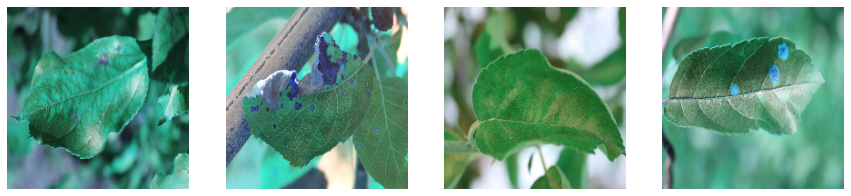

In [ ]:
# Display some test images
fig, ax = plt.subplots(1, 4, figsize = (15, 15))
for i in range(4):
    ax[i].set_axis_off()
    ax[i].imshow(train_image[i]) 

In [ ]:

test_image = []
for name1 in data_test['image_id']:
  print(name1)
  img1   = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/plant/data_2/images/'+name1+'.jpg')
  image1 = cv2.resize(img1, (200, 200))
  test_image.append(image1)
X_test = np.array(test_image)/255
len(X_test)

Test_0
Test_1
Test_2
Test_3
Test_4
Test_5
Test_6
Test_7
Test_8
Test_9
Test_10
Test_11
Test_12
Test_13
Test_14
Test_15
Test_16
Test_17
Test_18
Test_19
Test_20
Test_21
Test_22
Test_23
Test_24
Test_25
Test_26
Test_27
Test_28
Test_29
Test_30
Test_31
Test_32
Test_33
Test_34
Test_35
Test_36
Test_37
Test_38
Test_39
Test_40
Test_41
Test_42
Test_43
Test_44
Test_45
Test_46
Test_47
Test_48
Test_49
Test_50
Test_51
Test_52
Test_53
Test_54
Test_55
Test_56
Test_57
Test_58
Test_59
Test_60
Test_61
Test_62
Test_63
Test_64
Test_65
Test_66
Test_67
Test_68
Test_69
Test_70
Test_71
Test_72
Test_73
Test_74
Test_75
Test_76
Test_77
Test_78
Test_79
Test_80
Test_81
Test_82
Test_83
Test_84
Test_85
Test_86
Test_87
Test_88
Test_89
Test_90
Test_91
Test_92
Test_93
Test_94
Test_95
Test_96
Test_97
Test_98
Test_99
Test_100
Test_101
Test_102
Test_103
Test_104
Test_105
Test_106
Test_107
Test_108
Test_109
Test_110
Test_111
Test_112
Test_113
Test_114
Test_115
Test_116
Test_117
Test_118
Test_119
Test_120
Test_121
Test_122
Tes

1821

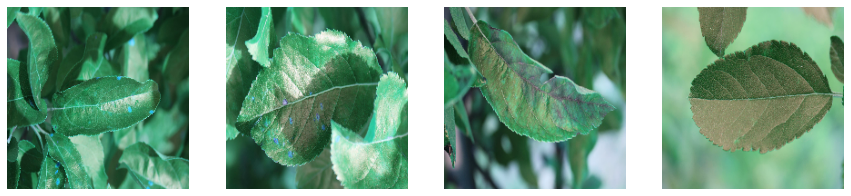

In [ ]:
# Display some test images
fig, ax = plt.subplots(1, 4, figsize = (15, 15))
for i in range(4):
    ax[i].set_axis_off()
    ax[i].imshow(test_image[i]) 

In [ ]:
y = data_train.copy()
del y['image_id']
y = np.array(y.values)

# thêm cột label : Lambda - hàm ẩn danh : lấy vị trí lớn nhất theo hàng ngang
#data_train['label'] = data_train.apply(lambda x: np.argmax(x[1:]),axis=1)



In [ ]:
y

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_valid , y_train , y_valid =train_test_split(X_train , y , test_size = 0.2 , random_state=42 )

In [ ]:
print(y_valid)

[[0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]


In [ ]:
from tensorflow.keras.layers import Input , Dense 
from tensorflow.keras.models import Model
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten, Input ,Reshape
# cnn
inp = Input(shape = (200,200,3))

cnn = Conv2D(filters = 64 , kernel_size = 3, activation = 'relu')(inp)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters = 64 , kernel_size = 3, activation = 'relu')(drop)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters = 64 , kernel_size = 3, activation = 'relu')(drop)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters = 64 , kernel_size = 3, activation = 'relu')(drop)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)
drop = Dropout(0.2)(pooling)

# cnn = Conv2D(filters = 64 , kernel_size = 3, activation = 'relu')(drop)
# pooling = MaxPooling2D(pool_size = (2,2))(cnn)
# drop = Dropout(0.2)(pooling)

# sử lý ảnh xong mới duỗi 
f = Flatten()(drop)
fc1 = Dense(units = 100 , activation = 'relu')(f)
fc2 = Dense(units = 100, activation = 'relu')(fc1)
out = Dense(units = 4 , activation = 'softmax')(fc2)

model = Model(inputs = inp , outputs = out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                         

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation for deep learning
# zoom_range: thực hiện zoom ngẫu nhiên 
# width_shift_range: Dịch theo chiều ngang 
# height_shift_range: Dịch ảnh theo chiều dọc 
# vertical_flip: Lật ảnh ngẫu nhiên theo chiều dọc
# horizontal_flip : Lật ảnh ngẫu nhiên thoe chiều ngang
# rotation_range: Xoay ảnh góc tối đa là 45 độ

datagen = ImageDataGenerator(rotation_range=360,      # Range for rotations
                             width_shift_range=0.2,   # Range for horizontal shifts
                             height_shift_range=0.2,  # Range for vertical shifts
                             zoom_range=0.2,          # Range for zoom
                             horizontal_flip=True,    # Range for horizontal flip
                             vertical_flip=True)      # Range for vertical flip


datagen.fit(x_train)




In [ ]:
#Keras Callback: Important API to keep the best model while training

# giảm learning rate khi val_accuracy không tốt 
# factor : để update learning rate mới : new lr = lr * factor 

annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1, min_lr=1e-3)
import tensorflow as tf


checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab_Notebooks/plant/model.offical', verbose=1, save_best_only=True)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization,Activation
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                              steps_per_epoch=x_train.shape[0] // 32,
                              epochs=200,
                              verbose=1,
                              callbacks=[annealer ,checkpoint ] ,
                              validation_data=(x_valid, y_valid))

Epoch 1/200
45/45 [==============================] - ETA: 0s - loss: 1.2623 - accuracy: 0.3448
Epoch 1: val_loss improved from inf to 1.29310, saving model to /content/drive/MyDrive/Colab_Notebooks/plant/model.offical
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_Notebooks/plant/model.offical/assets
45/45 [==============================] - 18s 333ms/step - loss: 1.2623 - accuracy: 0.3448 - val_loss: 1.2931 - val_accuracy: 0.3479 - lr: 0.0010
Epoch 2/200
45/45 [==============================] - ETA: 0s - loss: 1.2497 - accuracy: 0.3420
Epoch 2: val_loss improved from 1.29310 to 1.27717, saving model to /content/drive/MyDrive/Colab_Notebooks/plant/model.offical
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_Notebooks/plant/model.offical/assets
45/45 [==============================] - 14s 320ms/step - loss: 1.2497 - accuracy: 0.3420 - val_loss: 1.2772 - val_accuracy: 0.3288 - lr: 0.0010
Epoch 3/200
45/45 [==============================] - ETA: 0s - loss:

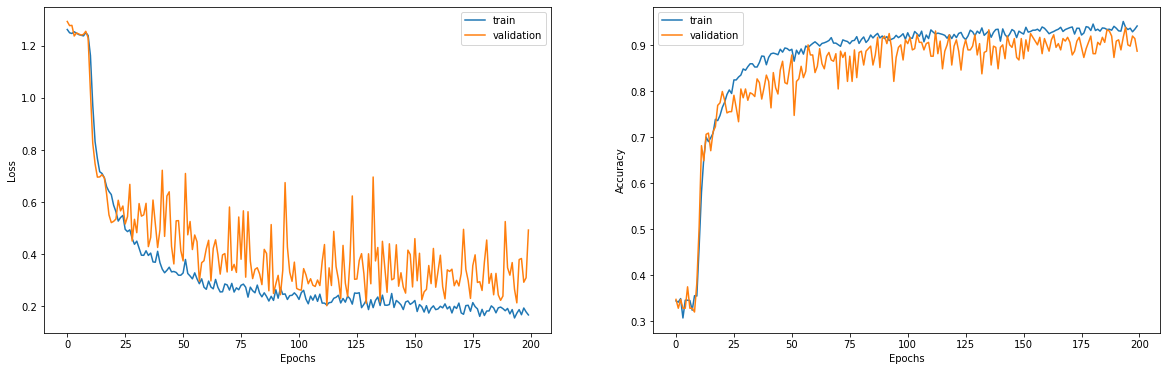

In [ ]:
h = history.history

plt.figure(1, figsize = (20, 6))

plt.subplot(121)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(h['loss'], label = 'train')
plt.plot(h['val_loss'], label = 'validation')
plt.legend()

plt.subplot(122)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(h['accuracy'], label = 'train')
plt.plot(h['val_accuracy'], label = 'validation')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab_Notebooks/plant/model.offical')

In [ ]:
y_pred = model.predict(x_valid)

In [ ]:
y_pred

array([[1.3169240e-11, 1.6108481e-02, 9.8389155e-01, 2.1482855e-09],
       [9.9861002e-01, 3.4418725e-04, 3.8349416e-04, 6.6224544e-04],
       [9.0280408e-01, 1.6762864e-02, 7.8480639e-02, 1.9524450e-03],
       ...,
       [3.2982206e-09, 5.4543719e-02, 9.4545615e-01, 6.7302089e-08],
       [1.6486609e-09, 3.1848484e-01, 6.8151450e-01, 6.2587185e-07],
       [5.2689733e-03, 5.4732668e-03, 2.7806238e-05, 9.8922986e-01]],
      dtype=float32)

In [ ]:
y_test_new = np.argmax(y_valid , axis = 1 )

In [ ]:
y_test_new

array([2, 0, 0, 2, 0, 2, 2, 0, 3, 3, 0, 0, 2, 3, 3, 2, 2, 2, 3, 0, 3, 3,
       1, 0, 3, 2, 0, 2, 2, 2, 2, 3, 3, 3, 2, 0, 2, 0, 3, 1, 2, 3, 3, 0,
       0, 2, 2, 0, 3, 3, 0, 3, 2, 0, 2, 3, 0, 3, 3, 0, 2, 1, 3, 2, 2, 0,
       2, 0, 3, 1, 3, 3, 1, 1, 0, 2, 3, 0, 3, 2, 3, 3, 3, 0, 2, 3, 0, 3,
       2, 0, 2, 2, 3, 0, 2, 0, 0, 3, 3, 3, 2, 2, 2, 1, 3, 2, 3, 0, 0, 0,
       2, 2, 2, 0, 3, 0, 2, 2, 3, 0, 3, 1, 2, 2, 3, 0, 2, 3, 0, 2, 3, 2,
       3, 2, 3, 3, 3, 3, 0, 2, 0, 3, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 0,
       3, 2, 3, 2, 3, 3, 0, 0, 0, 3, 2, 3, 2, 0, 3, 0, 0, 0, 3, 2, 2, 0,
       3, 2, 0, 2, 0, 3, 3, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 0, 3, 0, 0,
       3, 2, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 2, 2, 2, 0, 0, 3, 0, 3, 3,
       3, 0, 2, 2, 3, 3, 3, 3, 0, 2, 3, 3, 3, 0, 1, 3, 0, 0, 2, 0, 3, 1,
       2, 3, 0, 3, 0, 3, 2, 2, 1, 3, 2, 2, 3, 0, 2, 2, 0, 3, 2, 2, 1, 3,
       2, 0, 0, 0, 0, 3, 2, 0, 0, 0, 3, 3, 2, 2, 2, 3, 2, 3, 1, 2, 3, 3,
       0, 3, 0, 0, 0, 0, 2, 2, 3, 0, 0, 2, 2, 0, 0,

In [ ]:
y_pred_new  = np.argmax(y_pred , axis = 1)

In [ ]:
y_pred_new

array([2, 0, 0, 2, 0, 2, 2, 0, 3, 3, 0, 0, 2, 3, 3, 2, 2, 2, 3, 0, 3, 3,
       1, 0, 3, 2, 0, 2, 2, 2, 2, 3, 3, 3, 2, 0, 2, 0, 3, 1, 2, 3, 3, 0,
       0, 2, 2, 0, 3, 3, 3, 3, 2, 0, 2, 3, 0, 3, 3, 0, 2, 2, 3, 2, 2, 0,
       2, 0, 3, 2, 3, 3, 1, 3, 0, 2, 3, 0, 3, 2, 0, 3, 3, 0, 2, 3, 0, 3,
       2, 0, 2, 2, 3, 0, 2, 0, 0, 3, 3, 3, 0, 1, 2, 1, 0, 2, 3, 0, 0, 0,
       2, 2, 2, 0, 3, 0, 2, 2, 3, 0, 3, 1, 2, 2, 3, 0, 2, 3, 0, 2, 0, 2,
       3, 2, 3, 3, 3, 3, 0, 2, 0, 3, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0,
       3, 2, 3, 2, 3, 3, 0, 0, 0, 3, 2, 0, 2, 0, 3, 0, 0, 0, 3, 2, 2, 0,
       3, 2, 0, 2, 0, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 0, 3, 0, 0,
       3, 2, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 2, 2, 2, 0, 0, 3, 0, 3, 3,
       3, 0, 2, 2, 3, 3, 3, 3, 0, 2, 3, 0, 3, 0, 0, 3, 0, 0, 2, 0, 3, 1,
       2, 0, 0, 3, 0, 0, 2, 2, 3, 3, 2, 2, 0, 0, 2, 2, 0, 3, 2, 2, 1, 3,
       2, 0, 0, 3, 0, 3, 2, 3, 0, 0, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3,
       0, 3, 0, 0, 0, 0, 2, 2, 3, 0, 0, 2, 2, 0, 0,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new, y_pred_new))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       100
           1       0.75      0.50      0.60        18
           2       0.97      0.97      0.97       120
           3       0.94      0.92      0.93       127

    accuracy                           0.93       365
   macro avg       0.89      0.84      0.86       365
weighted avg       0.93      0.93      0.93       365



Tập Test 


In [ ]:
Y_pred_Test = model.predict(X_test)

In [ ]:
Y_pred_Test[0]

array([2.1513367e-10, 8.4250909e-04, 9.9915755e-01, 1.2627346e-09],
      dtype=float32)

In [ ]:
Y_pred_Test = np.argmax(Y_pred_Test , axis = 1)

In [ ]:
Test_label = []
for i in range ( Y_pred_Test.shape[0]):
  if Y_pred_Test[i] == 0 : 
    Test_label.append('Healthy')
  elif Y_pred_Test[i] == 1 :
    Test_label.append('Mul_siseases')
  elif Y_pred_Test[i] == 2 :
    Test_label.append('Rust')
  else :
    Test_label.append('Scab')

Label 2
Label Rust


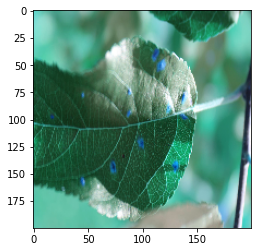

In [ ]:
i = 4
print("Label" , Y_pred_Test[i])
print("Label" , Test_label[i])
plt.imshow(X_test[i] , cmap = 'Reds')

Label 3
Label, Scab


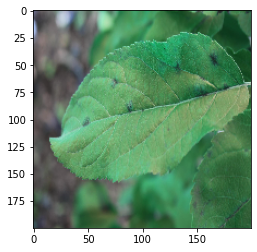

In [ ]:
i = np.random.randint(0,1000)
print("Label",Y_pred_Test[i])
print("Label,",Test_label[i])
plt.imshow(X_test[i] , cmap = 'Reds')

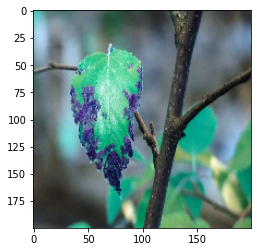

In [ ]:
img = cv2.imread("/content/Scab_2.jpg")
img = cv2.resize(img  , (200,200))
plt.imshow(img)

In [ ]:
img = np.array([img/255.])

In [ ]:
y_pred_img_1 = model.predict(img)

In [ ]:
y_pred_img_1 = np.argmax(y_pred_img_1 , axis = 1)

In [ ]:

for i in range ( y_pred_img_1.shape[0]):
  if y_pred_img_1[0] == 0 : 
    print('Healthy')
  elif y_pred_img_1[0] == 1 :
    print('Mul_siseases')
  elif y_pred_img_1[0] == 2 :
    print('Rust')
  else :
    print('Scab')

Scab
